In [1]:
import sys
import os
os.chdir("..")
sys.path.append(os.getcwd() + '/src')

from elisa.conf import config
config.LOG_CONFIG = os.getcwd() + 'jupyter_tutorials/logging.json' 

/home/miro/ELISa/src/elisa/conf/config.py:161: UserWarning: path /home/miro/ELISa/atmosphere/ck93
to kurucz 1993 atmosphere atlas doesn't exists
Specifiy it in elisa_conf.ini file
  "Specifiy it in elisa_conf.ini file".format(K93_ATM_TABLES))


# Demo No. 3 - Surface geometry

This demo will guide you trough building of the complete model of component's surface and it will demonstrate how to acces basic parameters os stellar surfaces. As usual, we will start with defining the binary system:

In [2]:
from elisa.binary_system.system import BinarySystem
from elisa.base.star import Star
from astropy import units as u


primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=3.6,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=10,  # angular size (in degrees) of the surface elements
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.2,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

INFO:BinarySystem:initialising object BinarySystem
INFO:BinarySystem:Setting discretization factor of secondary component to 15.59 as a according to discretization factor of the primary component 


Suppose, that we want to investigate surface geometry of the binary system `bs` at the following phase:

In [3]:
phase = 0.2

However, function for the construction of the stellar surfaces is using components distance as its input variable. Therefore we have to find corresponding component distance to our photometric phase (see Demo No. 2).

In [4]:
position = bs.calculate_orbital_motion(phase)[0]  # [0] at the end due to the fact that this function always returns list of positions
position

Position(idx=0.0, distance=1.0496298780877449, azimuth=3.0242149517677319, true_anomaly=2.0119239856110207, phase=0.20000000000000001)

Now we can calculate surfaces of the components by using following command:

In [5]:
bs.build(components_distance=position.distance)

## Accessing the surface data

If nothing happened, surface of the both component is now fully constructed. Now we can access all parameters connected with surface of the components. We can start with surface points which we can access with following:

In [6]:
secondary.points

array([[  8.46677935e-01,   0.00000000e+00,   1.24272224e-17],
       [  1.25148442e+00,   2.47200517e-17,   1.23600259e-17],
       [  8.55384070e-01,   5.70357154e-02,   1.23962610e-17],
       [  8.80356783e-01,   1.08785213e-01,   1.23208846e-17],
       [  9.18753041e-01,   1.51039921e-01,   1.22375561e-17],
       [  9.67022651e-01,   1.80884595e-01,   1.21763384e-17],
       [  1.02138837e+00,   1.96423970e-01,   1.21511808e-17],
       [  1.07789732e+00,   1.96604342e-01,   1.21623390e-17],
       [  1.13240650e+00,   1.81255523e-01,   1.22013076e-17],
       [  1.18069076e+00,   1.51252317e-01,   1.22547648e-17],
       [  1.21872107e+00,   1.08668312e-01,   1.23076445e-17],
       [  1.24308860e+00,   5.68046063e-02,   1.23460313e-17],
       [  1.01229730e+00,   3.73325792e-02,   1.89274998e-01],
       [  1.04962988e+00,   5.27952582e-02,   1.89271479e-01],
       [  1.08700456e+00,   3.73746863e-02,   1.89488479e-01],
       [  9.49558290e-01,   4.81919370e-02,   1.6350114

which returns 2D n x 3 numpy array of surface points in SMA units placed in corotating cartesian reference frame centered on the primary component with x-axis intersecting centre of the secondary component. Surface points mesh can be also visualized with following function:

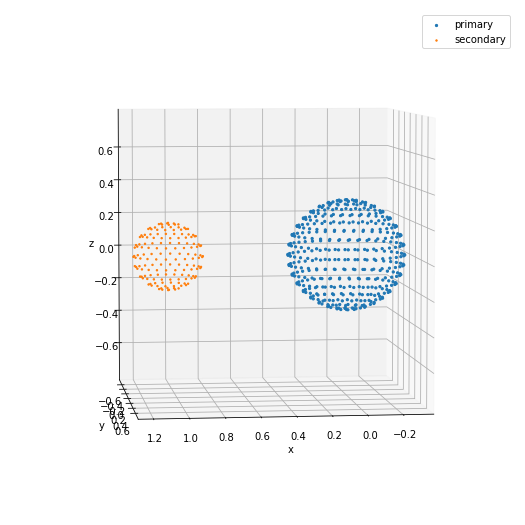

In [7]:
bs.plot.mesh(phase=phase)

Surface points were triangulated using Delaunay triangulation and the coresponding triangles (simplices) can be accessed in the form of N x 3 numpy array of indices, where N is number of faces on the surface and each triplet is pointing to corresponding face triangle vertex.

In [8]:
secondary.faces

array([[ 40,  11,   1],
       [  2,  48,   0],
       [ 13,  14,  44],
       [ 18,  13,  14],
       [ 18,  13,  17],
       [ 39,  40,  41],
       [ 39,  40,  11],
       [ 25,  35,  26],
       [ 25,  18,  26],
       [ 25,  18,  17],
       [ 31,  22,  21],
       [ 38,  11,  10],
       [ 38,  39,  11],
       [ 46,  47,  21],
       [ 34,   6,   7],
       [ 34,  35,   7],
       [ 34,   6,   5],
       [ 34,  33,   5],
       [ 34,  25,  35],
       [ 19,  18,  26],
       [ 19,  18,  14],
       [ 29,  38,  28],
       [ 29,  38,  39],
       [ 29,  39,  41],
       [ 29,  42,  41],
       [ 29,  20,  28],
       [ 29,  42,  20],
       [ 12,  45,  44],
       [ 12,  13,  44],
       [ 12,  13,  17],
       [ 12,  16,  17],
       [ 24,  33,  23],
       [ 24,  16,  23],
       [ 24,  25,  17],
       [ 24,  34,  25],
       [ 24,  34,  33],
       [ 24,  16,  17],
       [ 30,  31,  21],
       [ 31,   2,   3],
       [ 30,  31,   2],
       [ 30,  47,  21],
       [ 30,   2

Faces can be also visualized in form of the wireframe model:

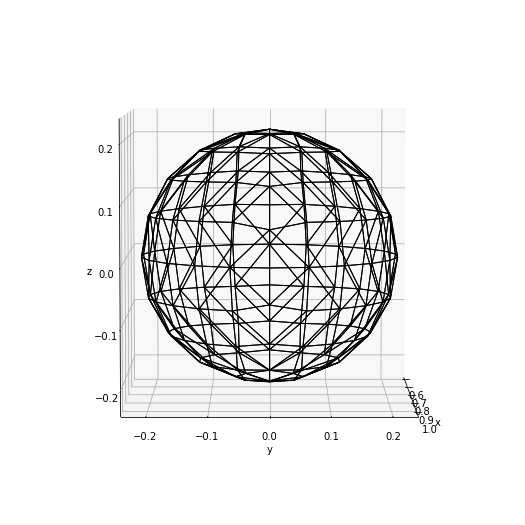

In [11]:
bs.plot.wireframe(components_to_plot='secondary')

or similarly:

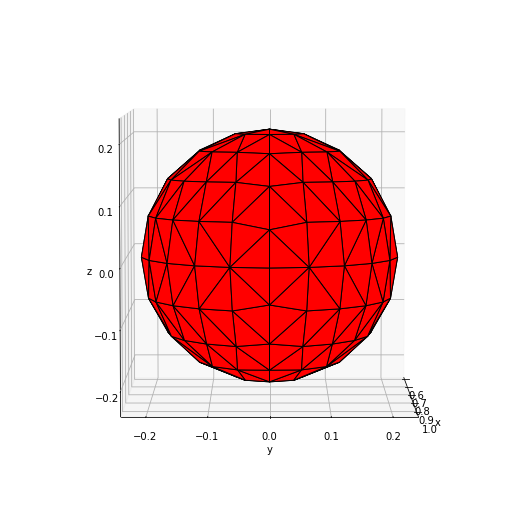

In [13]:
bs.plot.surface(components_to_plot='secondary',
                edges=True)

Finally, surface parameters such as gravitational acceleration or effective temperature for each face on the surface:

In [22]:
# secondary.log_g  # (log(SI))
secondary.temperatures

array([ 7214.68085474,  7218.52853813,  7244.65799688,  7247.238657  ,
        7246.86924881,  6926.17007806,  7019.77187641,  7033.10603599,
        7044.7271898 ,  7279.90720729,  7247.82806672,  7280.68221042,
        7188.26957526,  7185.96304753,  7158.34423355,  7169.90676113,
        7195.86545725,  7078.99796493,  7083.97549802,  7082.04915397,
        7074.07055078,  7035.77347804,  7034.70593706,  7008.1410391 ,
        6998.26762335,  6996.20778911,  6975.73039867,  6999.28495797,
        7008.45029124,  6989.66987602,  7170.9604382 ,  7186.60010039,
        7116.5985435 ,  7104.94631242,  7134.56278894,  7129.34497575,
        7145.7382399 ,  7007.64139606,  7008.65495431,  7018.23837468,
        7045.91680356,  7035.97117581,  7073.06394612,  7076.67649365,
        7057.20935367,  7049.19619818,  7059.04034656,  7064.03754436,
        7067.20310038,  7048.93563901,  7041.97858757,  7022.25157443,
        7007.93683105,  7018.61649377,  7012.32709285,  6941.75741612,
      

Of course, we can visualize them in the surface plot:

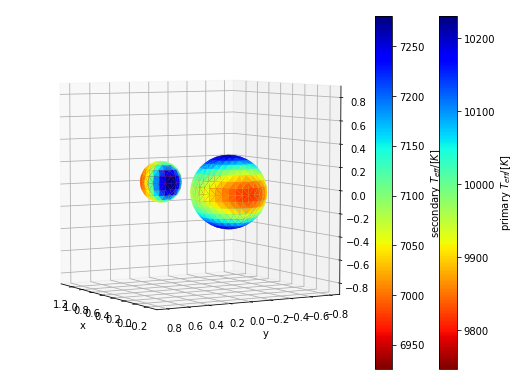

In [23]:
bs.plot.surface(phase=0.45,
                colormap='temperature',
#                 colormap='gravity_acceleration',
#                 units='log_cgs',
#                 axis_unit=u.solRad,
               )